In [11]:
# Import necessary libraries
import pandas as pd
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('default')

# Load the California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Display basic information
display("Original dataset", df.shape , df.head(1))

'Original dataset'

(20640, 9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [18]:
display("Data types", df.dtypes)
display("Missing values" , df.isnull().sum())

'Data types'

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

'Missing values'

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

<Figure size 1500x1000 with 0 Axes>

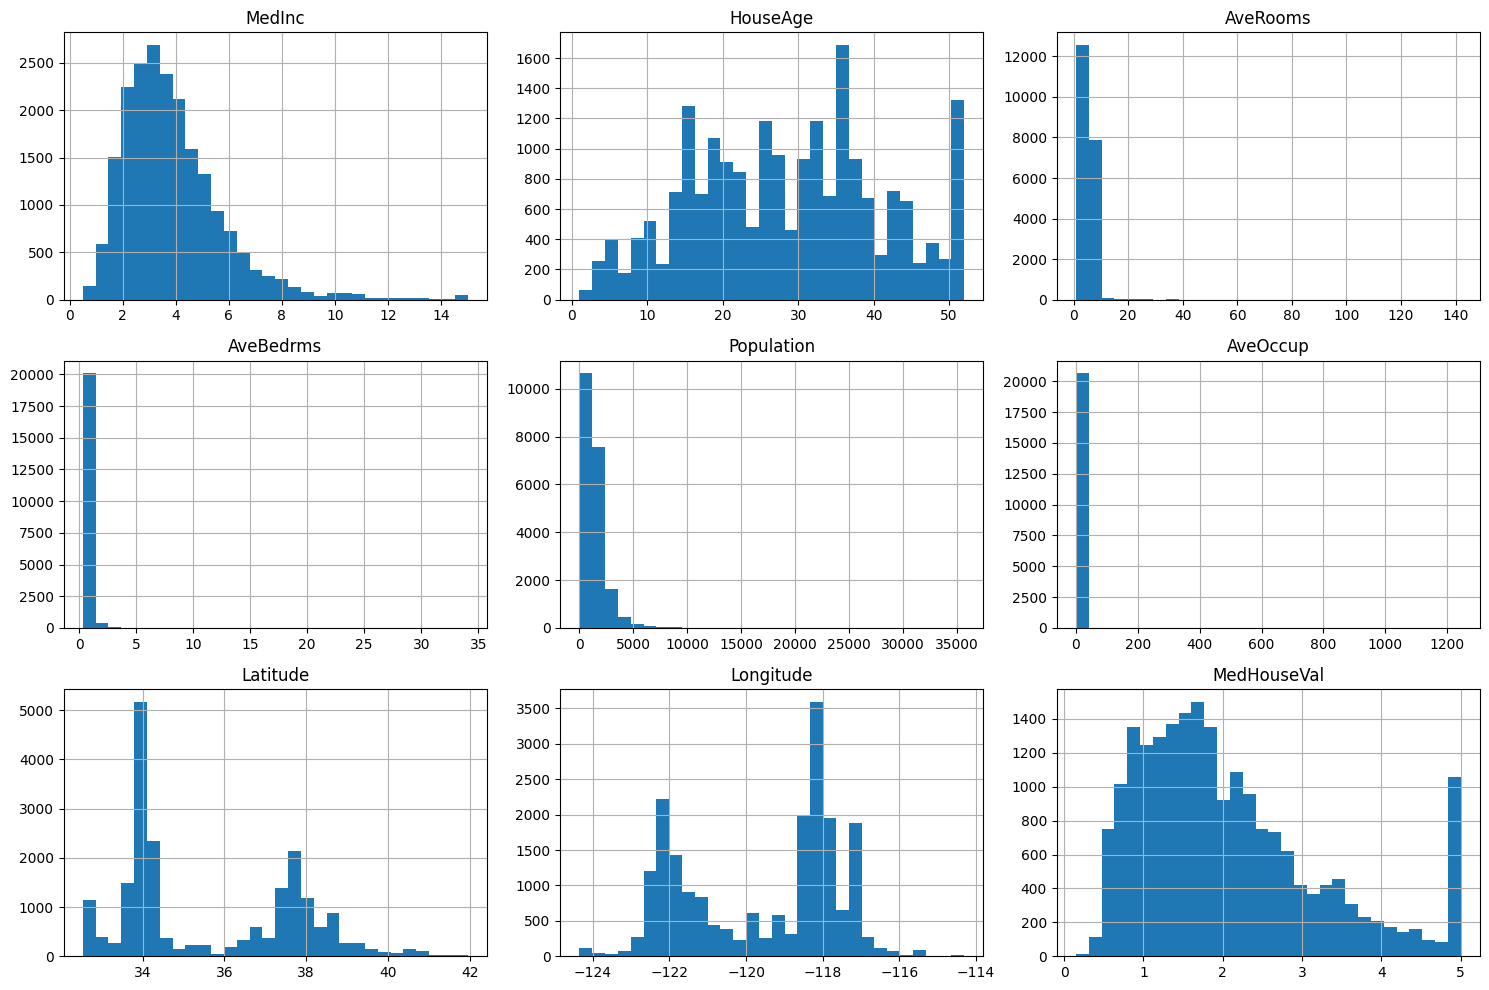

In [13]:
# 1. Data Distribution Analysis
plt.figure(figsize=(15, 10))
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

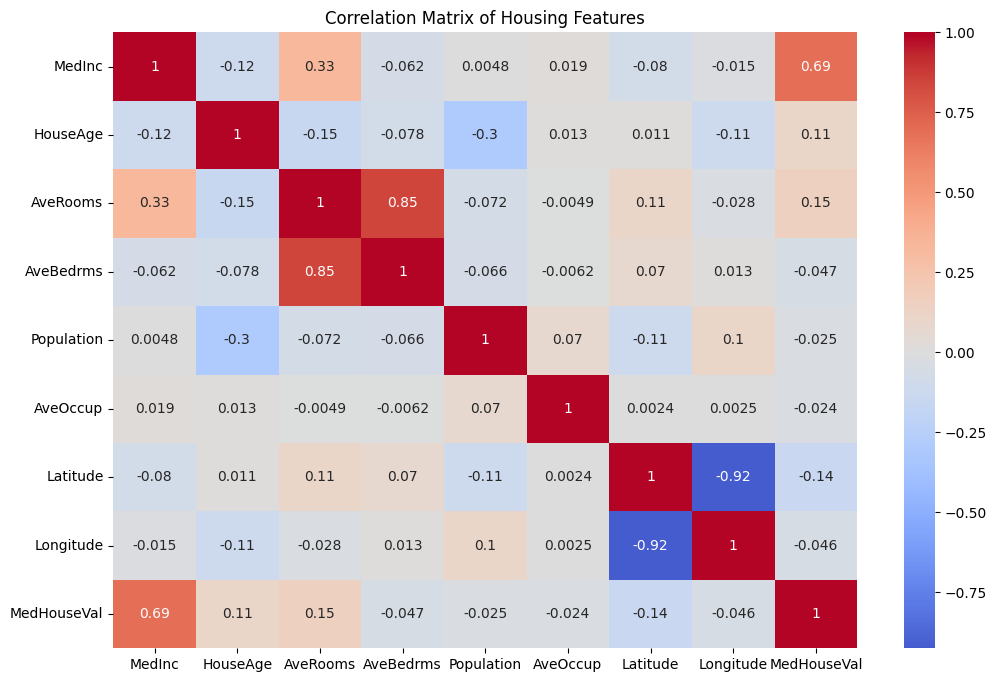

In [14]:
# 2. Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Housing Features')
plt.show()

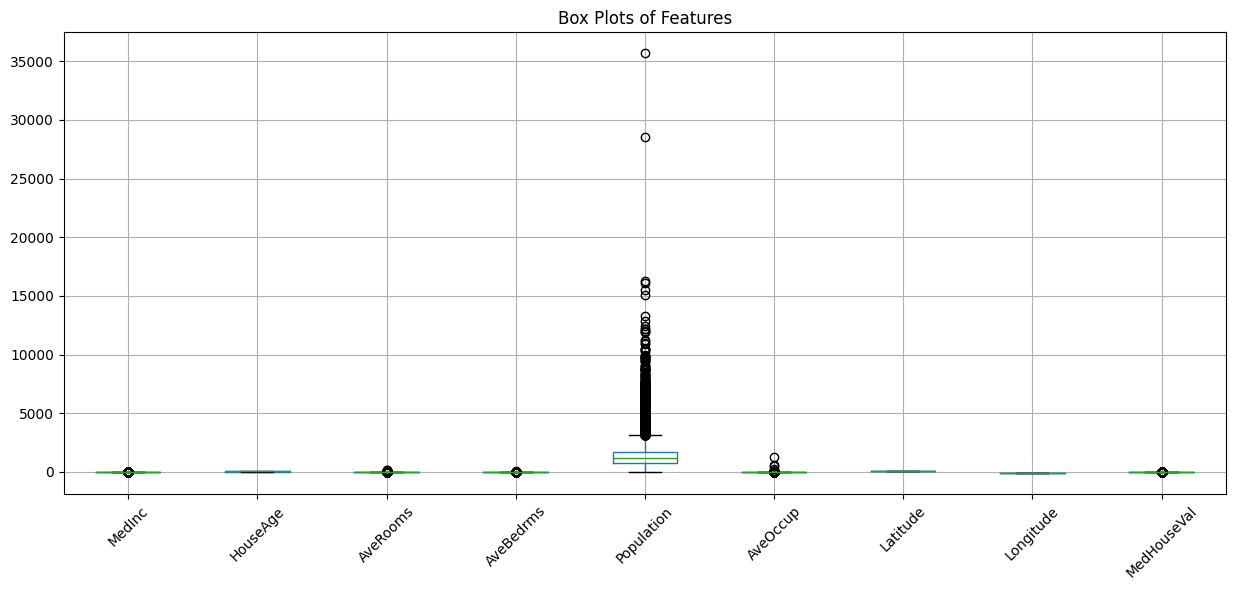

In [15]:
# 3. Box Plots for Outlier Detection
plt.figure(figsize=(15, 6))
df.boxplot(figsize=(15, 6))
plt.xticks(rotation=45)
plt.title('Box Plots of Features')
plt.show()

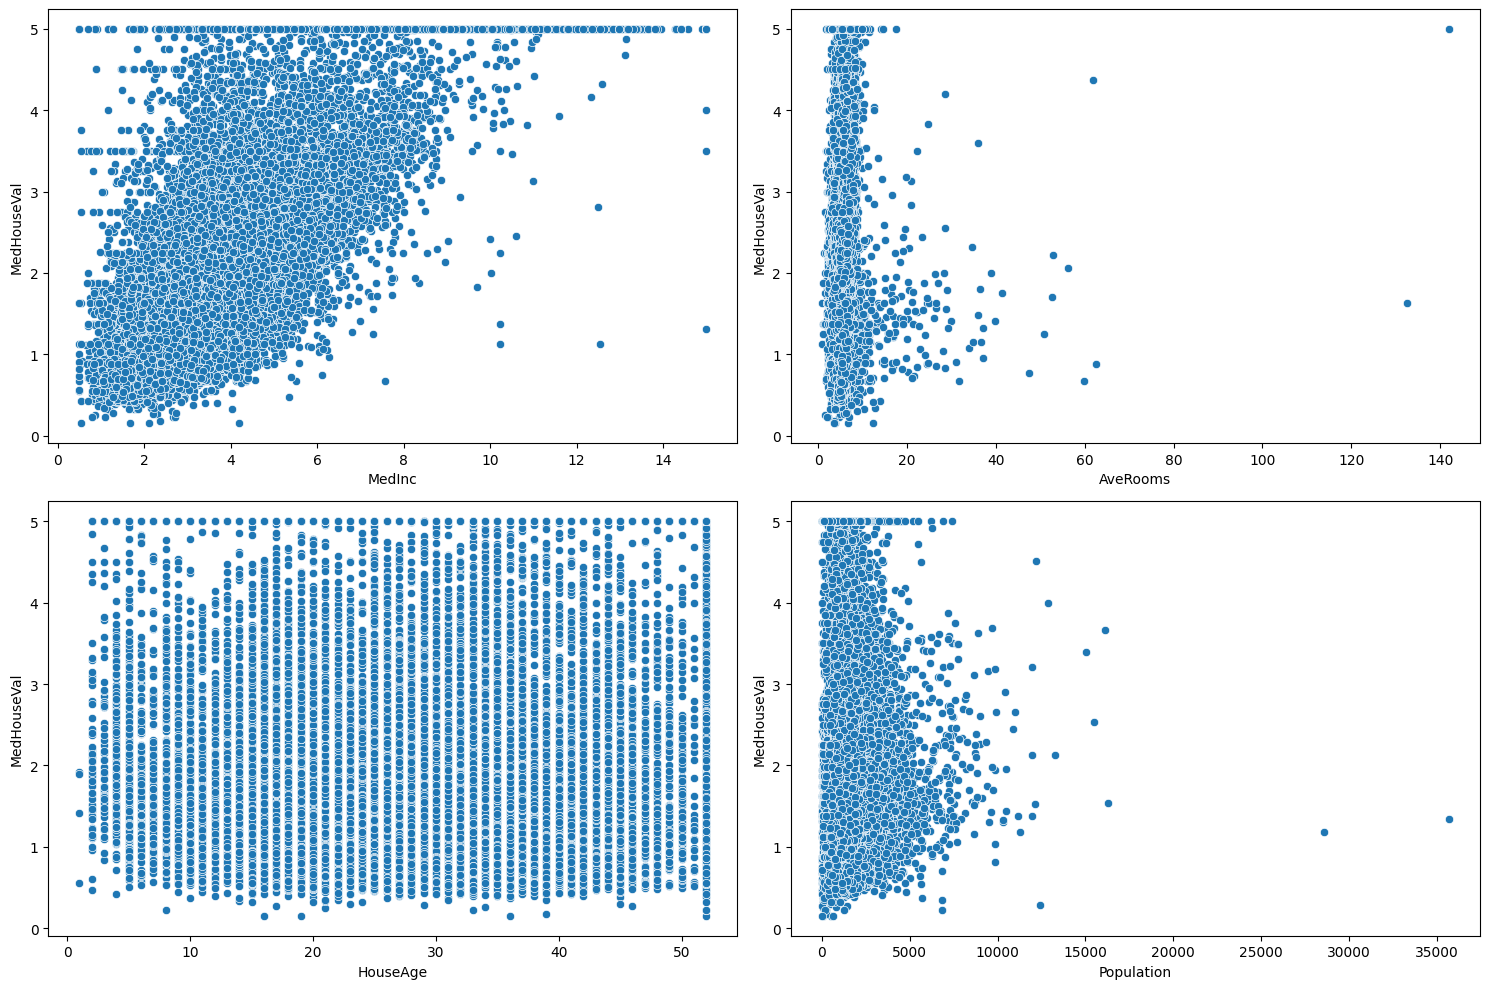

In [16]:
# 4. Scatter Plot of Most Important Features vs House Value
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', ax=axes[0,0])
sns.scatterplot(data=df, x='AveRooms', y='MedHouseVal', ax=axes[0,1])
sns.scatterplot(data=df, x='HouseAge', y='MedHouseVal', ax=axes[1,0])
sns.scatterplot(data=df, x='Population', y='MedHouseVal', ax=axes[1,1])
plt.tight_layout()
plt.show()

In [17]:
# 5. Basic Statistics Summary
print("\nSummary Statistics for Each Feature:")
display(df.describe())


Summary Statistics for Each Feature:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
# 7. Feature Analysis Summary
print("\nKey Insights:")
for column in df.columns:
    print(f"\n{column}:")
    print(f"Mean: {df[column].mean():.2f}")
    print(f"Median: {df[column].median():.2f}")
    print(f"Skewness: {df[column].skew():.2f}")


Key Insights:

MedInc:
Mean: 3.87
Median: 3.53
Skewness: 1.65

HouseAge:
Mean: 28.64
Median: 29.00
Skewness: 0.06

AveRooms:
Mean: 5.43
Median: 5.23
Skewness: 20.70

AveBedrms:
Mean: 1.10
Median: 1.05
Skewness: 31.32

Population:
Mean: 1425.48
Median: 1166.00
Skewness: 4.94

AveOccup:
Mean: 3.07
Median: 2.82
Skewness: 97.64

Latitude:
Mean: 35.63
Median: 34.26
Skewness: 0.47

Longitude:
Mean: -119.57
Median: -118.49
Skewness: -0.30

MedHouseVal:
Mean: 2.07
Median: 1.80
Skewness: 0.98



Q1: How do house values vary across different income levels?
Income_Category
Very Low     1.18
Low          1.57
Medium       1.94
High         2.30
Very High    3.35
Name: MedHouseVal, dtype: float64


/tmp/ipykernel_3139/748856222.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_house_value = df.groupby('Income_Category')['MedHouseVal'].mean().round(2)


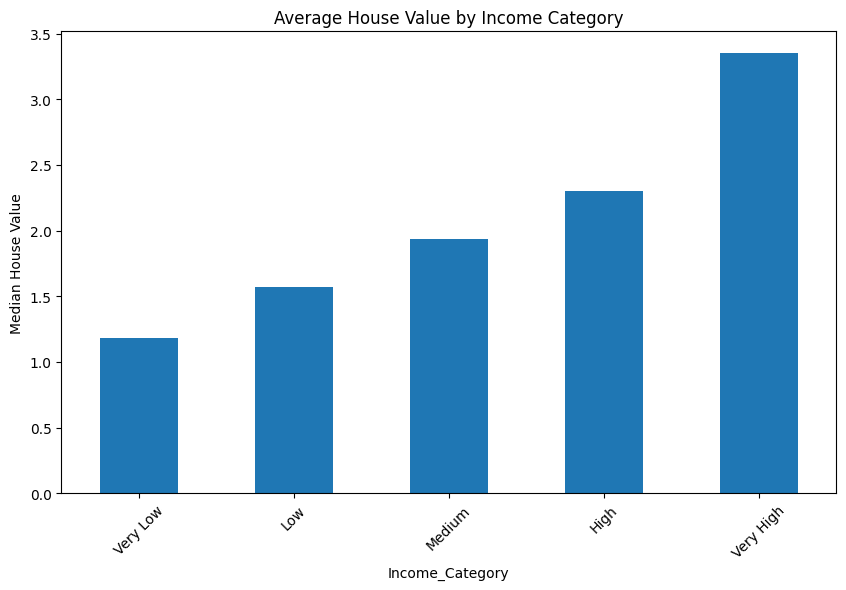

In [21]:
# 1. What is the average house value in different income brackets?
df['Income_Category'] = pd.qcut(df['MedInc'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
income_house_value = df.groupby('Income_Category')['MedHouseVal'].mean().round(2)

print("\nQ1: How do house values vary across different income levels?")
print(income_house_value)
plt.figure(figsize=(10, 6))
income_house_value.plot(kind='bar')
plt.title('Average House Value by Income Category')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

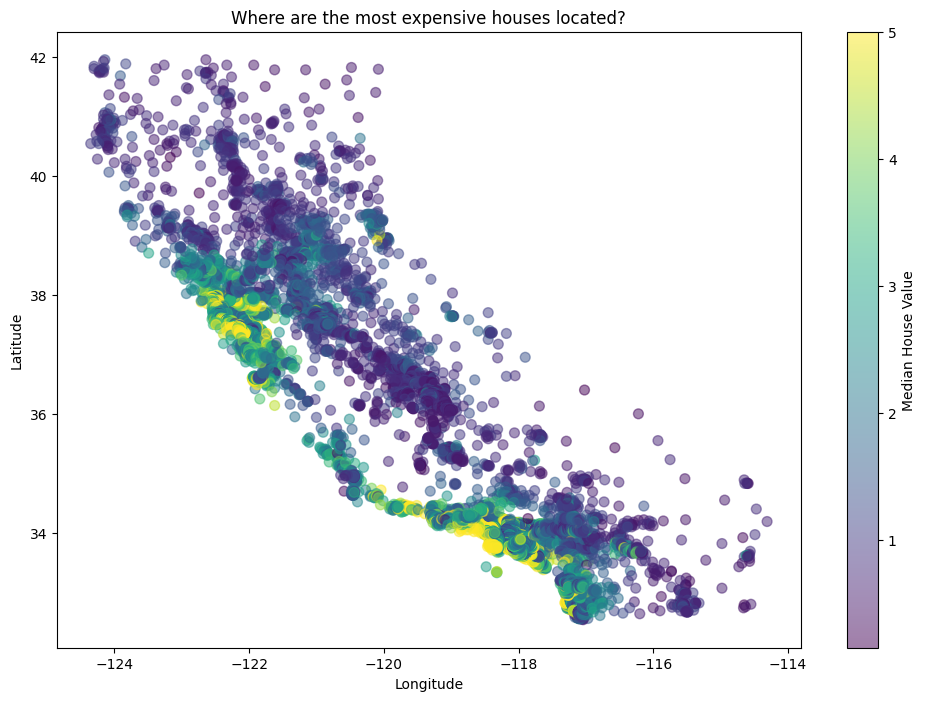

In [23]:
# 3. Which areas have the most expensive houses?
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], 
           c=df['MedHouseVal'], cmap='viridis',
           s=50, alpha=0.5)
plt.colorbar(label='Median House Value')
plt.title('Where are the most expensive houses located?')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipykernel_3139/1792867639.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rooms_value = df.groupby('RoomsBins')['MedHouseVal'].mean()


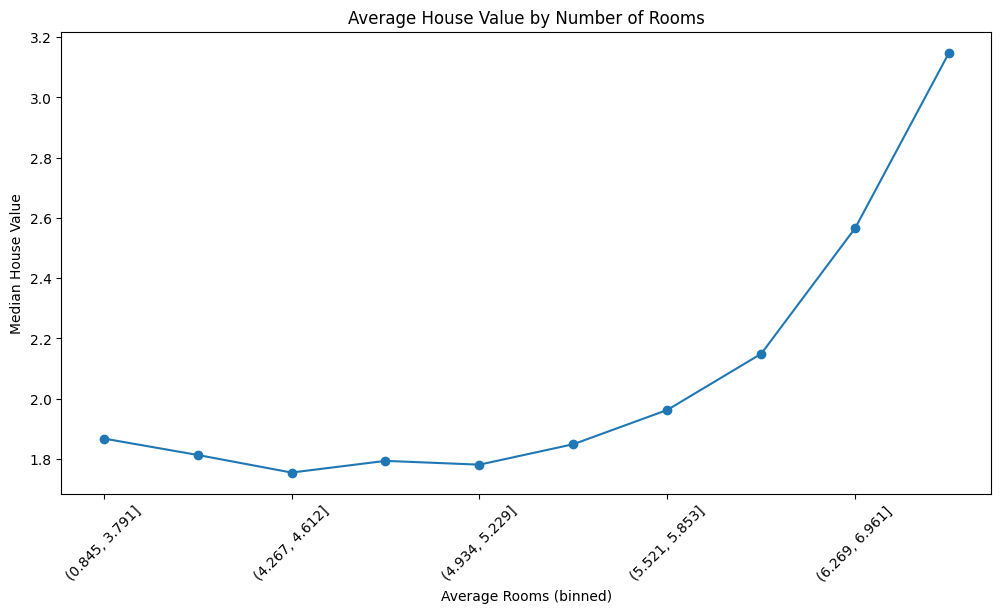

In [24]:
# 4. Is there an optimal number of rooms for house value?
df['RoomsBins'] = pd.qcut(df['AveRooms'], q=10)
rooms_value = df.groupby('RoomsBins')['MedHouseVal'].mean()

plt.figure(figsize=(12, 6))
rooms_value.plot(kind='line', marker='o')
plt.title('Average House Value by Number of Rooms')
plt.xlabel('Average Rooms (binned)')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

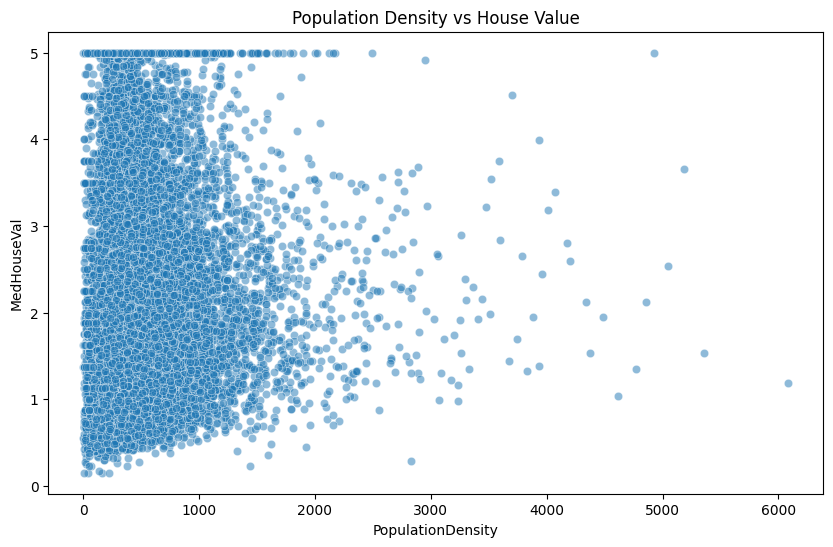

In [25]:
# 5. How does population density affect house values?
df['PopulationDensity'] = df['Population'] / df['AveOccup']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PopulationDensity', y='MedHouseVal', alpha=0.5)
plt.title('Population Density vs House Value')
plt.show()

In [26]:
# 6. Summary of findings
print("\nKey Findings:")
print("1. Income and House Value Relationship:")
print(f"   - Correlation: {df['MedInc'].corr(df['MedHouseVal']):.2f}")
print("\n2. House Age Analysis:")
print(f"   - Average house age: {df['HouseAge'].mean():.1f} years")
print(f"   - Oldest houses: {df['HouseAge'].max():.0f} years")


Key Findings:
1. Income and House Value Relationship:
   - Correlation: 0.69

2. House Age Analysis:
   - Average house age: 28.6 years
   - Oldest houses: 52 years


In [27]:
# 7. What percentage of houses are above the average value?
avg_value = df['MedHouseVal'].mean()
above_avg_percentage = (df['MedHouseVal'] > avg_value).mean() * 100

print(f"\n3. Price Distribution:")
print(f"   - Average house value: ${avg_value:.2f}")
print(f"   - {above_avg_percentage:.1f}% of houses are above average value")


3. Price Distribution:
   - Average house value: $2.07
   - 40.6% of houses are above average value


In [30]:
# 8. Is there an ideal house size (rooms) for maximum value?
optimal_rooms = df.groupby('RoomsBins')['MedHouseVal'].mean().idxmax()
print(f"\n4. Optimal House Size:")
print(f"   - Houses with {optimal_rooms} rooms tend to have the highest values")


4. Optimal House Size:
   - Houses with (6.961, 141.909] rooms tend to have the highest values


/tmp/ipykernel_3139/1382202939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  optimal_rooms = df.groupby('RoomsBins')['MedHouseVal'].mean().idxmax()
